In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
import warnings
warnings.filterwarnings('ignore')

In [88]:
train_data_dir = ('E:\\Data science\\Guvi Assesments\\IMAGE CLASSIFICATION\\archive (5)\\dataset\\training_set')
test_data_dir  = ('E:\\Data science\\Guvi Assesments\\IMAGE CLASSIFICATION\\archive (5)\\dataset\\test_set')

In [89]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [90]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 1760 images belonging to 1 classes.
Found 2000 images belonging to 2 classes.


##### Feature Extraction and Model Building

In [91]:
model = Sequential()

In [92]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [94]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [95]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/10
88/88 [==============================] - 94s 1s/step - loss: 0.0130 - accuracy: 0.9818 - val_loss: 10.3486 - val_accuracy: 0.5000


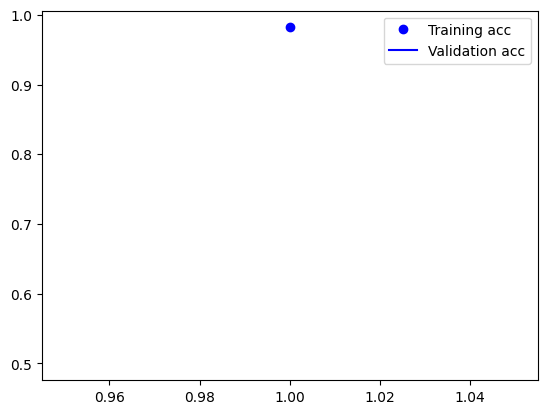

In [96]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()


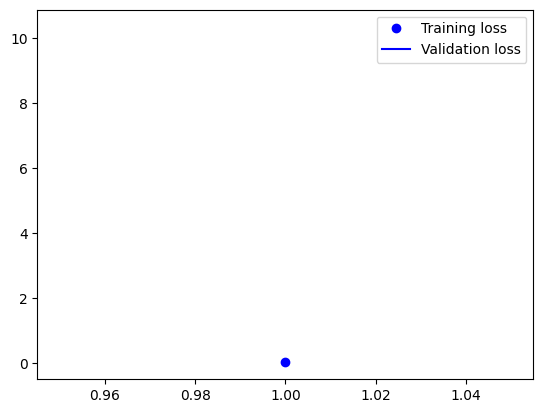

In [97]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [98]:
model.save('catvsdog.h5')

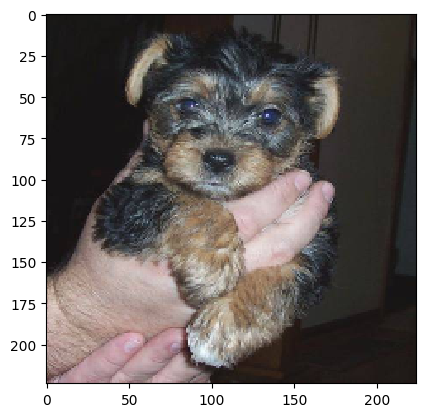

In [99]:
from tensorflow.keras.preprocessing import image
path ='C:\\Windows\\Temp\\65c0da49-bfff-44a6-98a1-99ff947a302b_archive (5).zip.02b\\dog vs cat\\dataset\\test_set\\dogs\\dog.4002.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [100]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [101]:
img_array=img_array.reshape(1,224,224,3)

In [103]:
a = model.predict(img_array)
if a==[[0]]:
    print('dog')
else:
    print('cat')

1/1 [==============================] - 0s 67ms/step
dog
